In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import make_scorer, f1_score

from sklearn import svm

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

import shap


In [2]:
seed = 42

## Read the Data

In [3]:
X = pd.read_csv('./data/eeg_features.csv')
X.head()

,alpha_Channel_1,alpha_Channel_2,alpha_Channel_3,alpha_Channel_4,alpha_Channel_5,beta_Channel_1,beta_Channel_2,beta_Channel_3,beta_Channel_4,beta_Channel_5,...,health_condition_dementia,health_condition_diabetes,health_condition_heart attack,health_condition_marijuana,health_condition_ms,health_condition_nan,health_condition_none,health_condition_ocd,health_condition_schizophrenia,health_condition_unknown
0,3.021524,1.396534,0.058007,0.126120,0.943253,1.697809,0.449966,0.448933,0.042286,0.503213,...,0,0,0,0,0,1,0,0,0,0
1,1.468518,1.367280,0.195930,0.273963,1.305134,0.679067,2.827446,3.364760,0.346790,0.202916,...,0,0,0,0,0,1,0,0,0,0
2,0.985983,1.177478,0.036685,0.289934,0.189099,0.137623,0.468998,3.133384,0.882983,1.953640,...,0,0,0,0,0,0,1,0,0,0
3,4.738183,0.139540,0.236183,0.789740,0.163361,0.707772,0.793514,2.799493,1.562262,0.158909,...,0,0,0,0,0,0,1,0,0,0
4,0.975364,1.393986,0.661216,0.028347,0.372354,1.112621,3.872213,1.441918,0.827960,1.879537,...,0,1,0,0,0,0,0,0,0,0


In [4]:
X.shape

(220, 118)

In [5]:
y = pd.read_csv('./data/eeg_depression_target.csv')
y.sample(10)

,has_depression
39,1
208,1
161,0
184,0
62,0
73,0
46,1
174,1
168,0
78,1


In [6]:
f1_scorer = make_scorer(f1_score)

## Support Vector Classifier

### Linear Kernel

In [7]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y.values.reshape(y.shape[0],), cv=5, scoring=f1_scorer)
scores.mean()

0.8858156748911465

### Polynomial Kernel

In [8]:
clf = svm.SVC(kernel='poly', C=1, random_state=42)
scores = cross_val_score(clf, X, y.values.reshape(y.shape[0],), cv=5, scoring=f1_scorer)
scores.mean()

0.8479576355847541

### Linear Kernel

In [9]:
clf = svm.SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(clf, X, y.values.reshape(y.shape[0],), cv=5, scoring=f1_scorer)
scores.mean()

0.8565403843891348

### Sigmoid Kernel

In [10]:
clf = svm.SVC(kernel='sigmoid', C=1, random_state=42)
scores = cross_val_score(clf, X, y.values.reshape(y.shape[0],), cv=5, scoring=f1_scorer)
scores.mean()

0.7909368778958124

## AdaBoost

In [11]:

kfold = KFold(n_splits = 5, random_state = seed, shuffle=True)
num_trees = 100
max_features = 50
ADBclf = AdaBoostClassifier(n_estimators = num_trees)
results = cross_val_score(ADBclf, X, y.values.reshape(y.shape[0],), cv = kfold, scoring=f1_scorer)
print(results.mean())

1.0


## Random Forest

In [12]:
num_trees = 100
rf_clf = RandomForestClassifier(n_estimators=num_trees)
results = cross_val_score(rf_clf, X, y.values.reshape(y.shape[0],), cv = kfold, scoring=f1_scorer)
print(results.mean())

1.0


In [13]:
results

array([1., 1., 1., 1., 1.])

## Exploring Feature Importance with Random Forests

 * For starters, let's look at the random forest model. They have a built-in feature importance, which is usually a very good strating point.
 * We can explore the feature importances and see how much insight we can gain

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(y.shape[0],), 
                                                    test_size=0.20, random_state=seed)

In [15]:
rf_clf = RandomForestClassifier(n_estimators=num_trees)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
rf_clf.feature_importances_

array([0.00958464, 0.00222832, 0.00324857, 0.00506   , 0.00541603,
       0.00644271, 0.00249037, 0.01465191, 0.00496821, 0.00478189,
       0.00463186, 0.00708915, 0.00366966, 0.01534134, 0.00398399,
       0.00335233, 0.00181843, 0.00164431, 0.0045234 , 0.0036908 ,
       0.00773108, 0.00698244, 0.00304074, 0.00272383, 0.00166988,
       0.00404165, 0.00558063, 0.00372031, 0.00636463, 0.00260336,
       0.002449  , 0.00581735, 0.00231563, 0.00220307, 0.00423486,
       0.00422919, 0.00476587, 0.00230636, 0.00233574, 0.00309483,
       0.00134297, 0.00518008, 0.00363701, 0.0045995 , 0.00383857,
       0.0025609 , 0.00500725, 0.00425782, 0.00172324, 0.00266137,
       0.0057579 , 0.00348269, 0.00277425, 0.01623851, 0.00451281,
       0.00265635, 0.00316252, 0.00220504, 0.00313929, 0.00526776,
       0.00180853, 0.00303751, 0.00703604, 0.0043109 , 0.00482905,
       0.01728254, 0.00176124, 0.00515793, 0.00333369, 0.00244785,
       0.00492663, 0.00556824, 0.00331587, 0.00236449, 0.00460

 * We can see that the random forest feature importances alone are not very informative:
     * The total number of features is large
     * Most features have fairly similar imprtance score.
     * This "general picture" is not useful when one tries to analyze the EEG results of a specific sunbject

## Exploring Feature Importance with SHAP

 * Let's utilize the SHAP score, the way it is implemented in the `shap` library
 * SHAP score is based on a so called Shapley value. It is perhaps the most popular method of interpreting an ML model predictions. Its advantages are:
     * Has a solid theoretical foundation (game theory)
     * Allows contrastive explanations
     * Model agnostic: can be applied to a broad variety of ML algorithms
     * Local: Allows interpreting a specific prediction

In [17]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X)


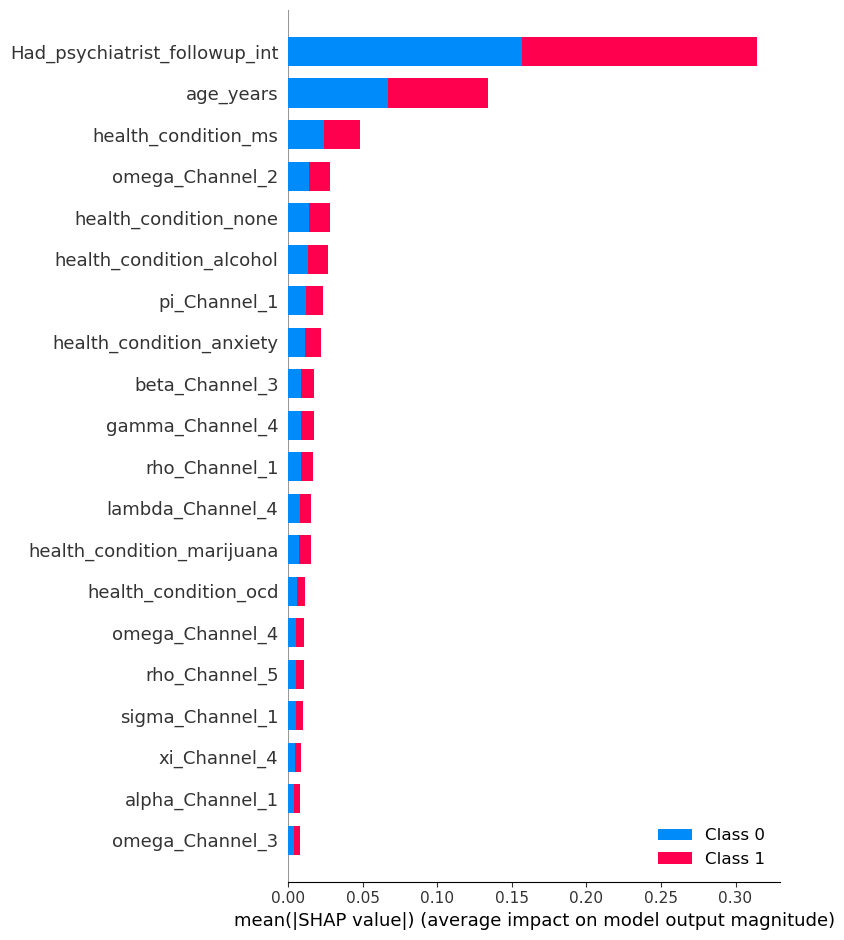

In [18]:
shap.summary_plot(shap_values, X)